In [1]:
import sys
sys.path.append("D:\portfolio\Generalized-Linear-Models\src")

In [2]:
from preprocessing import preprocess_data
from logistic_model import LogisticRegressionScratch
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

file_path = 'D:\portfolio\Generalized-Linear-Models\data\pima_diabetes.csv'
target_column = 'Outcome'
X_train, X_test, y_train, y_test = preprocess_data(file_path, target_column)

X_test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
521,3,124,80,33,130,33.2,0.305,26
737,8,65,72,23,0,32.0,0.600,42
740,11,120,80,37,150,42.3,0.785,48
660,10,162,84,0,0,27.7,0.182,54
411,1,112,72,30,176,34.4,0.528,25


In [5]:
model = LogisticRegressionScratch(lr=0.0001, n_iters=1000)
model.fit(X_train, y_train)

[False False False  True False  True  True False  True False  True False
 False  True  True  True  True  True  True  True False False  True False
 False  True  True  True  True  True  True False False  True  True  True
  True  True  True False False False  True  True  True False  True  True
 False  True False  True  True  True False False False False  True False
  True  True False  True  True  True False  True False False  True  True
 False  True False False  True  True  True  True  True False False False
  True  True False False  True  True  True  True  True False  True  True
  True  True  True False  True False  True  True False False False  True
 False  True  True  True  True  True  True False  True False False  True
  True  True  True  True  True False False  True  True  True  True  True
 False  True False False  True  True  True False  True  True  True  True
 False  True  True  True  True False  True False  True False  True False
  True  True  True False  True False  True False  T

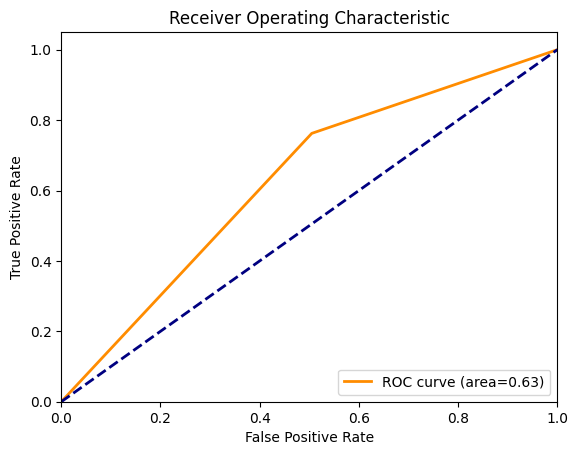

In [6]:
y_pred = model.predict(X_test)
print(y_pred)


fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area=%0.2f)'% roc_auc)
plt.plot([0,1],[0,1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()